In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import mglearn

5장   
- **모델평가, 매개변수 선택에 대해 더 자세히 알아보자!**
    - 안정적인 일반화 성능 측정 방법인 **'교차 검증'**에 대해
    - score 메서드가 제공하는 '정확도'와'R^2'값 **이외의 분류와 회귀 성능 측정하는 다른 방법**에 대해
- **지도 학습** 회귀, 분류에 집중
    - 비지도 학습 모델을 평가하고 선택하는 일은 매우 정성적인 작업이라 평가 힘드므로...

In [32]:
# 전반적인 모델링 및 평가 과정
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋 생성
X, y = make_blobs(random_state=0)
# train/test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체 생성 및 학습(fit)
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 test set으로 평가
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


# 교차검증(cross-vaildation)
- 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한번 나누는 것 보다 더 안정적이고 뛰어난 통계적 평가 방법
- 데이터를 여러 번 반복해서 나누고 여러 모델을 학습함
- 가장 널리 사용되는 교차검증 방법: **k-겹 교차 검증(k-fold cross-vaildation)**
    - k: 보통 5 ~ 10 사용
- 교차 검증 함수는 모델을 반환하지 않으니 주의!
    - 새로운 데이터에 적용할 모델을 만드는 방법이 아니라, 단지 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화 될지 평가하는 것

장점
- 교차 검증 점수를 (평균값을) 높이기 위해서는 데이터 셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야함
- 모델이 훈련데이터에 얼마나 민감한지 알 수 있음
    - 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있음
- 분할을 한번만 했을 때보다 데이터를 효과적으로 사용    
       
단점
- 연산 비용이 k배 만큼 늘어남

## cross_val_score
- model_selection 모듈의 **cross_val_score** 함수로 구현되어있음
- 매개변수
    - 평가 하려는 모델
    - 훈련 데이터
    - 타깃 레이블
    - cv
        - 폴드 수 지정 : k 기본값 5
        - 교차 검증 분할기 전달 가능
            - 데이터를 분할할 때 더 세밀하게 제어 가능
    - n_jobs=-1

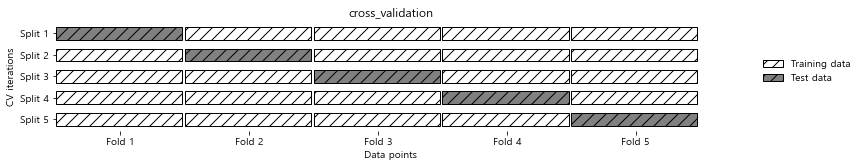

In [3]:
mglearn.plots.plot_cross_validation()   # k=5일때

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)   # 기본 값으로 하면 경고 출력됨

scores = cross_val_score(logreg, iris.data, iris.target)   # k 기본값 5, 폴드 수는 cv 매개변수를 사용해 변경 가능
print('교차 검증 점수:',scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
len(scores)

5

In [12]:
# 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 평균 점수: 0.97


## cross_validate 함수
- cross_val_score 함수와 비슷해 테스트 세트의 점수 반환하며, 분할마다 훈련과 테스트에 걸린 '시간'을 담은 딕셔너리를 반환
    - 설정에 따라 훈련 점수도 추가로 얻을 수 있음
- cross_val_score 함수는 cross_validate함수를 사용해 test_score 부분만 반환하는 것

In [13]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)  # return_train_score=True
display(res)

{'fit_time': array([0.04291797, 0.04992795, 0.03128266, 0.0312407 , 0.03124213]),
 'score_time': array([0.00099492, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [14]:
# df
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.042918,0.000995,0.966667,0.966667
1,0.049928,0.000000,1.000000,0.966667
2,0.031283,0.000000,0.933333,0.983333
3,0.031241,0.000000,0.966667,0.983333
4,0.031242,0.000000,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.037322
score_time     0.000199
test_score     0.973333
train_score    0.975000
dtype: float64


## cross_val_score - 분류, 회귀
- 분류 문제 시, 단순한 k-겹 교차 검증으로 발생하는 문제
    - 단순 KFold는  데이터셋을 나열된 순서대로 k개의 폴드로 나눔
    - 분류 문제일 때 섞지 않고 k개의 fold로 나누면 문제가 생길 수 있음
    - 한 fold안에 특정 class가 몰려서 들어있을 수도      
        
해결방법 1    
- 기본적으로 cross_val_score 함수는 분류에서 StratifiedKFold를 사용하므로 문제가 되지는 않음
- 계층별 k-겹 교차검증(stratified k-fold cross-validation) 사용!
- fold안의 class비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔       
      
해결방법 2 
- 분류에서 계층별 폴드를 만드는 대신, 데이터를 섞는 방법 
- KFold에서 shuffle 매개변수를 기본값 False대신, **True로 지정**하면 폴드를 나누기 전에 무작위로 섞을 수 있음
    - 하지만, cross_val_socre 함수를 사용할 때 KFold의 매개변수를 제어할 방법이 없음
    - 따라서, 따로 KFold 객체를 만들어 cross_val_socre함수의 **cv 매개변수로 전달**해야함!
      
      
- 회귀에서는 단순 KFold 적용

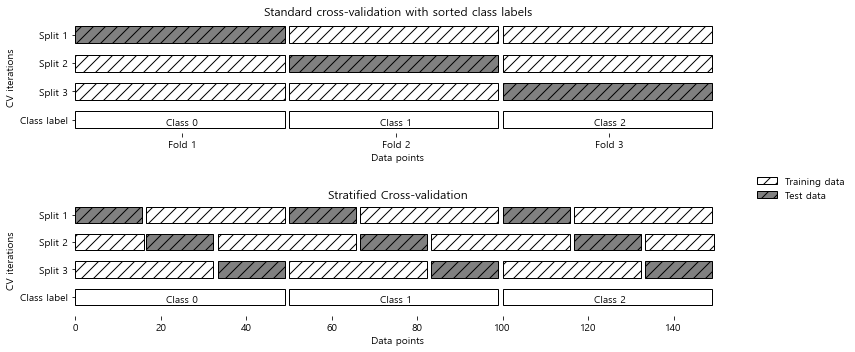

In [16]:
mglearn.plots.plot_stratified_cross_validation()

### 계층별 폴드 대신, 데이터 섞기

In [19]:
from sklearn.model_selection import KFold

# kfold 객체 생성
kfold = KFold(n_splits=3)

# kfold 객체를 cross_val_score의 cv 매개변수로 전달!
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))  # cv=kfold

교차 검증 점수:
 [0. 0. 0.]


In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

- 데이터를 섞지 않고, 단순 KFold로 나눌경우 특정 class가 한 fold에 몰린채 데이터가 나눠지는 문제 발생

In [22]:
# kfold 객체 생성 - shuffle 옵션 True
kfold = KFold(n_splits=3, shuffle=True, random_state=0) # random_state=0: 재현 가능하게

# kfold 객체를 cross_val_score의 cv 매개변수로 전달!
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))  # cv=kfold

교차 검증 점수:
 [0.98 0.96 0.96]


- 데이터를 섞은 뒤 데이터를 나눔으로써, 문제가 해결됨

## LOOCV(Leave-one-out cross-validation)
- LOOCV도 교차 검증 방법으로 자주 사용됨
- 하나의 데이터 포인트를 선택해 테스트 세트로 사용
    - 폴드 하나에 샘플 하나만 들어있는 K-겹 교차 검증으로 생각하면 쉬움
    - 데이터셋이 클 때는 시간이 매우 오래 걸림
    - 작은 데이터셋에서는 가끔 더 좋은 결과를 만들어냄

In [25]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)   # cv에 LOOCV객체 전달
print('교차 검증 분할 횟수:', len(scores))
print('평균 정확도: {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.97


## 임의 분할 교차 검증(shuffle-split cross-validation)
- train_szie만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 (train_set과 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할
- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야할 때 유용
- 전체 데이터의 일부만 사용할 수 있음
    - 데이터를 부분 샘플링하는 방식은 **대규모 데이터셋**으로 작업할 때 도움이 됨
- 매개변수
    - train_size, test_size: 정수 = 데이터 포인트 절대 개수, 실수 = 전체 데이터에서의 비율
    - n_splits: 횟수만큼 분할 반복됨
- ShuffleSplit
    - 데이터에서 무작위로 추출하여 train/test set을 만듬 (random_state 매개변수 지정 않하면 실행할 때마다 결과가 다르게 나옴)
    - 하나의 데이터 포인트가 여러 테스트 세트에 포함될 수도 있음
- StratifiedShuffleSplit
    - ShuffleSplit의 계층별 ver. 분류 작업에 더 적합함

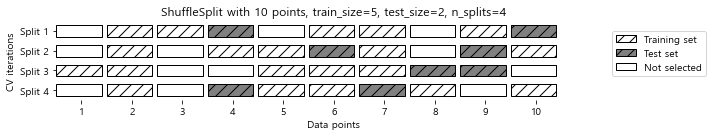

In [26]:
mglearn.plots.plot_shuffle_split()

In [30]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.93333333 0.93333333 0.98666667 0.94666667 0.96       0.94666667
 0.97333333 1.         0.96       0.98666667]


## 그룹별 교차 검증
- groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것(클래스 레이블과 혼동하면 안됨!)
    - 각 분할에서 한 그룹 전체가 훈련 세트 or 테스트 세트에 있게 함!
- groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹(ex. 환자, 사람 등)에 속하는 지를 나타냄
- 사진의 사람(그룹)이 누구인지를 기록한 배열을 groups 매개변수로 전달받을 수 있는 GroupKFold를 사용
    - 함수 내부에서 cv.splits() 메서드 호출 시 groups를 매개 변수로 전달함

예시 
- ex 1. 데이터 셋에 없는 사람의 표정을 정확히 구분해내는 것이 목표
    - 새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면, 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야함
- ex 2. 의료 data: 같은 환자로부터 얻은 여러 샘플을 가지고, 새로운 환자에게 일반화하는 것이 목적 

In [36]:
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)

# 처음 세 개의 샘플을 같은 그룹에 속하고, 다음은 네 개의 샘플이 같음, ..
# 함수 내부에서 cv.splits() 메서드 호출 시 groups를 매개 변수로 전달함
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


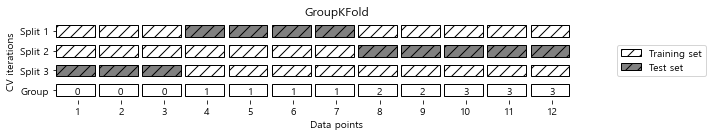

In [37]:
mglearn.plots.plot_group_kfold()

- 각 분할에서 한 그룹 전체가 훈련 세트 or 테스트 세트에 있음

## 반복 교차검증
- 데이터셋의 크기가 크지 않은 경우, 안정된 검증 점수를 얻기 위해 **교차 검증을 반복**하여 여러번 수행
    - 반복할 때마다 데이터를 다시 섞음
- **클래스의 객체**를 cross_val_score(or cross_validate) 함수의 **cv 매개변수에 전달**하여 교차 검증 반복
- 반복 교차 검증 분할기
    - 회귀: RepeatedKFold 사용
    - 분류: RepeatedStratifiedKFold 사용
        - RepeatedStratifiedKFold는 StratifiedKFold class 사용함
    - 이 두 분할기는 GridSearchCV의 cv 매개변수에도 적용 가능
- 매개변수
    - n_splits: 분할 폴드수
    - n_repeats: 반복 횟수 (기본값 10)
  

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)   # n_splits, n_repeats 모두 기본값으로 수행
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print('교차 검증 점수:\n', scores)
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965


C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 반복 교차 검증으로 평균 점수 0.957을 얻음